In [57]:
#Imports needed

#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Train Test Split
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import MinMaxScaler

#Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

#Evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#File Directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/saudi-arabia-real-estate-aqar/SA_Aqar.csv


In [58]:
# Reading csv file
df = pd.read_csv('/kaggle/input/saudi-arabia-real-estate-aqar/SA_Aqar.csv')

# EDA

In [59]:
#Sorting values 
df.sort_values(by='price',ascending=False).head(5)

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
1206,جدة,حي الروضة,شمال,2500,0,5,5,5,1,1,...,1,0,1,1,0,1,1,0,1700000,العقار فيه مميزات كثير له وله تراخيص جاهزه مجه...
1168,جدة,حي الحمدانية,3 شوارع,300,0,5,5,3,1,1,...,1,0,1,1,0,1,1,1,1300000,فيلا فاخرة حي الحمدانيه\nمكونات المشروع دورين ...
1974,الدمام,حي ضاحية الملك فهد,شمال,250,0,5,5,1,1,1,...,1,0,1,0,0,1,0,0,800000,دبلوكس في الضاحيه مكون من 3ادوار ارضي مجالس ال...
417,الرياض,حي طويق,شرق,400,32,5,3,1,1,1,...,0,0,1,0,0,0,0,0,800000,فيلا دور دور مساحه ٤٠٠ متر على شارعين شرقيه وش...
950,الرياض,حي الاسكان,غرب,250,0,3,3,2,1,1,...,0,0,1,0,1,1,0,1,800000,دبلكسات متلاصقة\nمساحات من ٢٤٥ الى ٢٥٠ م \nشار...


In [60]:
#Describe the data
df.describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03
mean,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,0.495697,0.795320,0.123453,0.560785,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04
std,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,0.500049,0.403522,0.329001,0.496358,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04
50%,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


In [61]:
#Check null values
df.isna().sum()

city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         80
dtype: int64

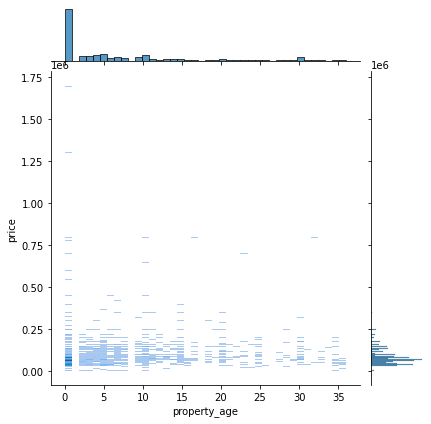

In [62]:
#Jointplot comparing property age and the price of rental with kind histogram
sns.jointplot(x='property_age',y='price',data=df,kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

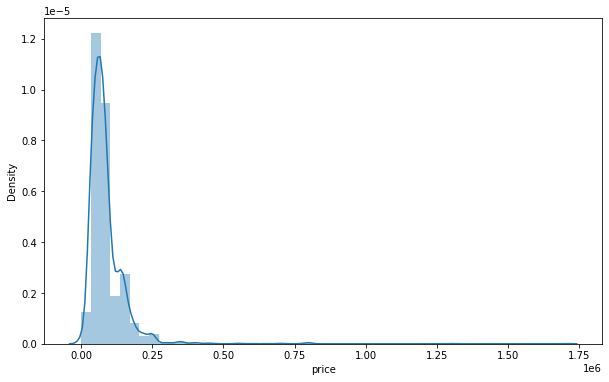

In [63]:
#distplot for the price
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

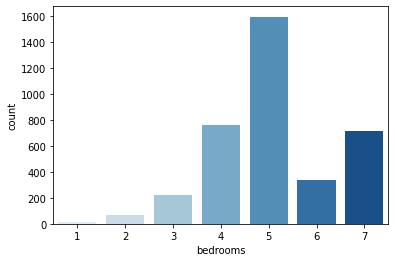

In [64]:
#Countplot for the number of bedrooms
sns.countplot(df['bedrooms'],palette='Blues')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bathrooms', ylabel='count'>

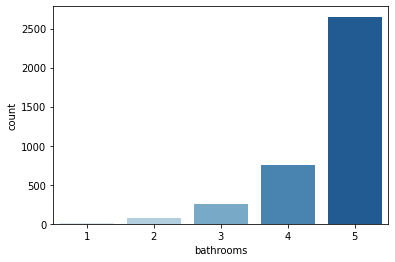

In [65]:
#Countplot for the number of bathrooms
sns.countplot(df['bathrooms'],palette='Blues')

<AxesSubplot:xlabel='price', ylabel='size'>

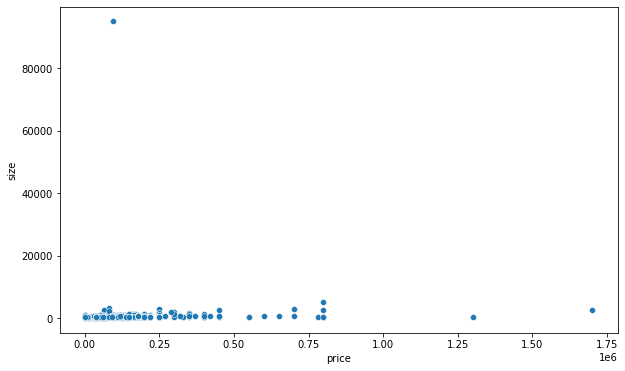

In [66]:
#Scatterplot for the price vs size
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='size',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

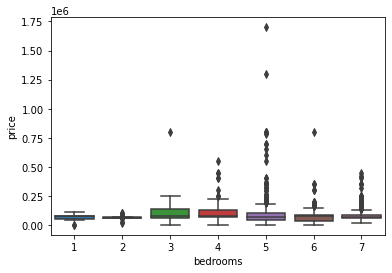

In [67]:
#Boxplot comparing number of bedrooms with rental price
sns.boxplot(x='bedrooms',y='price',data=df)

<Figure size 720x432 with 0 Axes>

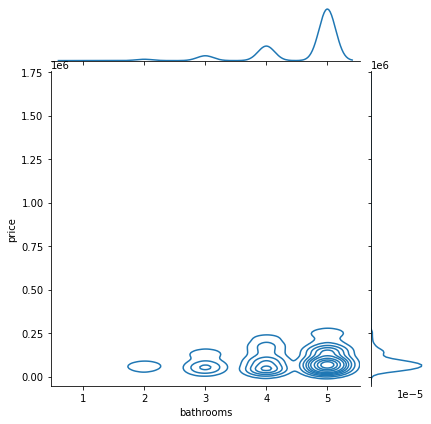

In [68]:
#Jointplot comparing bathrooms and price of rental with kernal density estimation
plt.figure(figsize=(10,6))
sns.jointplot(x='bathrooms',y='price',data=df,kind='kde')

# Data Cleaning

In [69]:
#Dropping outliers
df = df[df['price'] < 300000]
df = df[df['size'] < 1600]

In [70]:
#One hot encoding

In [71]:
ct = pd.get_dummies(df['city'])
ds = pd.get_dummies(df['district'])
fr = pd.get_dummies(df['front'])

In [72]:
df = pd.concat([df,ct,ds,fr],axis=1)

In [73]:
df.drop(['city','district','front','details','3 شوارع','4 شوارع'],axis=1,inplace=True)

# Train Test Split

In [74]:
X = df.drop(['price'],axis=1)
y = df['price']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Scaling the data

In [76]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the model

In [77]:
#Creating a model with 7 layers & an output layer with scaled exponential linear unit activation function
model = Sequential()
model.add(Dense(25,activation='selu'))
model.add(Dense(25,activation='selu'))
model.add(Dense(25,activation='selu'))
model.add(Dense(25,activation='selu'))
model.add(Dense(25,activation='selu'))
model.add(Dense(25,activation='selu'))
model.add(Dense(25,activation='selu'))
model.add(Dense(1))

#Using MAE as loss function
model.compile(optimizer='adam',loss='mean_absolute_error')

In [78]:
model.fit(x=X_train, y=y_train.values, validation_data=(X_test,y_test.values), batch_size=128, epochs=500, verbose=1)

Epoch 1/500
21/21 [==============================] - 1s 16ms/step - loss: 82000.9609 - val_loss: 83208.0156
Epoch 2/500
21/21 [==============================] - 0s 9ms/step - loss: 81988.1562 - val_loss: 83189.5469
Epoch 3/500
21/21 [==============================] - 0s 9ms/step - loss: 81955.8906 - val_loss: 83125.4609
Epoch 4/500
21/21 [==============================] - 0s 8ms/step - loss: 81804.1016 - val_loss: 82777.0156
Epoch 5/500
21/21 [==============================] - 0s 9ms/step - loss: 80969.9609 - val_loss: 80914.4688
Epoch 6/500
21/21 [==============================] - 0s 9ms/step - loss: 76857.3750 - val_loss: 72279.7344
Epoch 7/500
21/21 [==============================] - 0s 8ms/step - loss: 59512.4492 - val_loss: 40543.0625
Epoch 8/500
21/21 [==============================] - 0s 9ms/step - loss: 31935.1797 - val_loss: 30552.5059
Epoch 9/500
21/21 [==============================] - 0s 9ms/step - loss: 29168.4961 - val_loss: 29449.6465
Epoch 10/500
21/21 [================

# Evaluation

<AxesSubplot:>

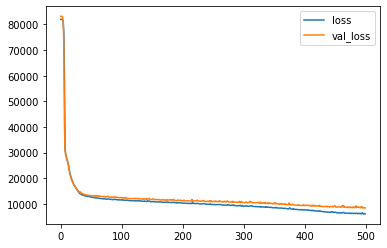

In [79]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [80]:
predictions = model.predict(X_test)

In [81]:
#MAE
mean_absolute_error(y_test,predictions)

8420.239358484474

In [82]:
#RMSE
np.sqrt(mean_squared_error(y_test,predictions))

20296.786006413735

In [83]:
#Explained Variance
explained_variance_score(y_test,predictions)

0.7988295813392274

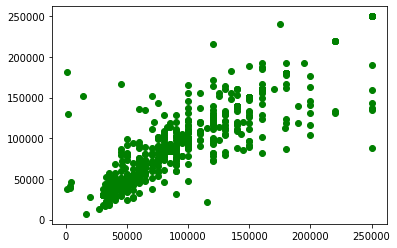

In [84]:
# Scatter plot of predictions vs test data
plt.scatter(y_test,predictions,color='g')